<h1><center>Exercise 8</center></h1>
<h2><center>Video manipulation on jupyter notebook y motion detection</center></h2>

The objetive of this exercise is to be an introduction to video in OpenCV and Python and to demonstrate basic motion detection algorithms. For the first part of the exercisewe will be using the video sequence 'shopping_center.mpg' and for the motion section the images 'foreman69.png' and foreman70.png'and the functions in 'motionalgorithms.py'. 
To display video we will be using a new library: bokeh which allows the reproduction of video inside the notebook. It's also recommended to have an external video player, preferably VLC.

In [2]:
import numpy as np
import cv2
import motionalgorithms as ma
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
import time
from matplotlib import pyplot as plt
output_notebook()
%matplotlib notebook


Loading BokehJS ...

**I. Basic video functions**

To start working with video in OpenCV first we need to create a video capture object using the function [cv2.videoCapture](https://docs.opencv.org/master/d8/dfe/classcv_1_1VideoCapture.html#a57c0e81e83e60f36c83027dc2a188e80). This function allows the user to either capture video directly from a camera connected to the computer, or open video files. In this case we will be using the video 'shopping_center.mpg' as an example.

First you create the video capture object calling the function, then use the method videoCapture.read which returns two variables, the first one is a boolean value indicating if the frame has been read correctly, the second is the frame as a numpy matrix. That gets you the first frame of the video. To read the rest you must use a while loop. [Here is an example](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html).

It's important to remeber that the video capture object must be released once all frames have been read using the method [release](https://docs.opencv.org/master/d8/dfe/classcv_1_1VideoCapture.html#afb4ab689e553ba2c8f0fec41b9344ae6).

Try storing all the frames in the video 'shopping_center.mpg' in a list called frames. If done right this list will have a length of 560 frames and all its items will be uint8 matrices.



In [3]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,image = vidcap.read()
count = 0
frames = []
while success:
  frames.append(image)     # save frame as JPEG file      
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1
vidcap.release()

print(len(frames))

560


Now we can find some of the video properties. First open again the video with videoCapture. To know the number of frames we can just chack the length of the array from the last point, but for some other characteristics you will need the method [get](https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d) from video capture.

Use this method to learn the framerate of the video and theheight and width of each frame.
Remember to close the video file afterwards.


In [7]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
print('numero de frames: ' + str(len(frames)))
print('ancho de cada frame: ' + str(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('alto de cada frame: ' + str(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frames per second: ' + str(vidcap.get(cv2.CAP_PROP_FPS)))
vidcap.release()

numero de frames: 560
ancho de cada frame: 384.0
alto de cada frame: 288.0
frames per second: 25.0


Primer frame

Now take the first frame of the video and save it in a new variable. Get its data type, size and shape and represent it using Matplotlib.

uint8
331776
(288, 384, 3)


<IPython.core.display.Javascript object>


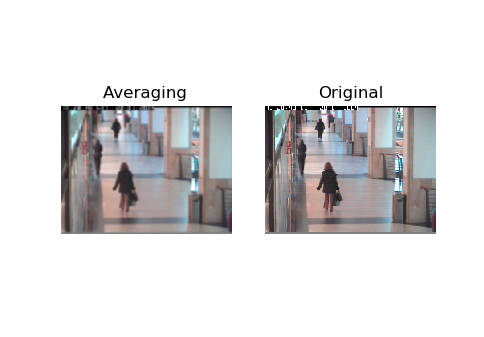

In [13]:
frame1 = frames[0]

print(frame1.dtype)
print(frame1.size)
print(frame1.shape)

frame=cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
plt.figure('Primer Frame')
plt.imshow(frame1, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Reproducir el video usando bokeh

https://stackoverflow.com/questions/27882255/is-it-possible-to-display-an-opencv-video-inside-the-ipython-jupyter-notebook

https://docs.bokeh.org/en/latest/index.html


In [16]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,frame = vidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/25)    
vidcap.release()    

Reproducir con diferente fps 35

In [17]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,frame = vidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage = p.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p, notebook_handle=True)

while success:
    success,frame = vidcap.read()
    if not success:
        vidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/35)    
vidcap.release() 

Operaciones sobre frames individuales

Frame 10, filtro de media

<IPython.core.display.Javascript object>


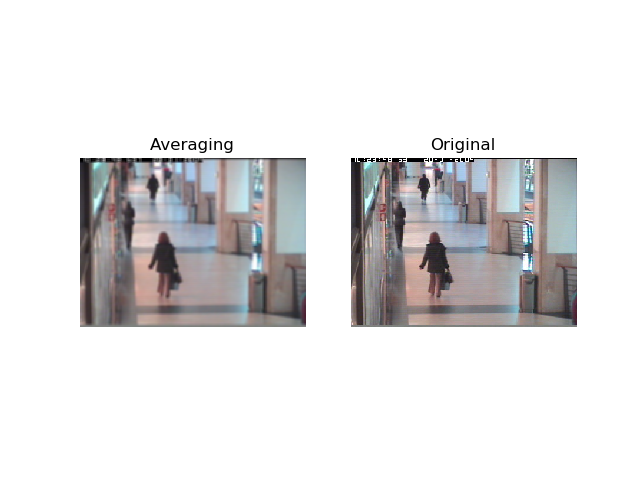

In [19]:
#filtro de media en uno
kernel = np.ones((5,5),np.float32)/25
new10 = cv2.filter2D(frames[10],-1,kernel)

new10rgb=cv2.cvtColor(new10, cv2.COLOR_BGR2RGB)
old10=cv2.cvtColor(frames[10], cv2.COLOR_BGR2RGB)

plt.figure('filtro de media')
plt.subplot(121),plt.imshow(new10rgb, vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(old10, vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Negativo de otro

<IPython.core.display.Javascript object>


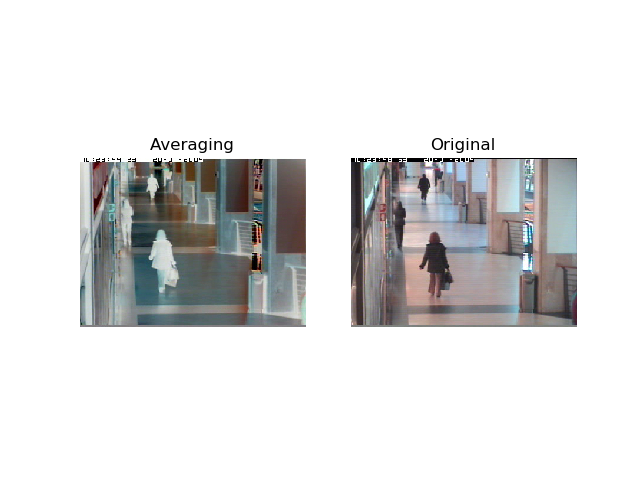

In [20]:
#negativo

new25 = 255-frames[25]

new25rgb=cv2.cvtColor(new25, cv2.COLOR_BGR2RGB)
old25=cv2.cvtColor(frames[25], cv2.COLOR_BGR2RGB)

plt.figure('negativo')
plt.subplot(121),plt.imshow(new25rgb, vmin = 0, vmax = 255),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.subplot(122),plt.imshow(old10, vmin = 0, vmax = 255),plt.title('Original')
plt.xticks([]), plt.yticks([])
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

Sustituir en el video, crear nueva estructura de video y reproducir

In [21]:
#sustituir en el video 

frames[10] = new10
frames[25] = new25
height, width, layers = new25.shape
size = (width,height)

out = cv2.VideoWriter('newshopping.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(frames)):
    out.write(frames[i])
out.release()

Comprobar que se ha guardado la nueva estrutura en el folder

In [23]:
#reproducir nuevo video

newvidcap = cv2.VideoCapture('newshopping.avi')
success,frame = newvidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p3 = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage3 = p3.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p3, notebook_handle=True)
cont = 0
while success:
    success,frame = newvidcap.read()
    if not success:
        newvidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage3.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/25)  
vidcap.release()  

Todos a negativo, guardar y reproducir


In [29]:
vidcap = cv2.VideoCapture('shopping_center.mpg')
success,image = vidcap.read()

count = 0
height, width, layers = image.shape
size = (width,height)

out = cv2.VideoWriter('negativeshopping.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

while success:
    image = 255-image
    out.write(image)
    success,image = vidcap.read()
    count += 1
vidcap.release()

In [30]:
#reproducir nuevo video

newvidcap = cv2.VideoCapture('negativeshopping.avi')
success,frame = newvidcap.read()

frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
frame=cv2.flip(frame, -1) # because Bokeh flips vertically
width=frame.shape[1]
height=frame.shape[0]
p3 = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=width, height=height)
myImage3 = p3.image_rgba(image=[frame], x=0, y=0, dw=width, dh=height)
show(p3, notebook_handle=True)
cont = 0
while success:
    success,frame = newvidcap.read()
    if not success:
        newvidcap.release()
        break
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    frame=cv2.flip(frame, -1)
    myImage3.data_source.data['image']=[frame]
    push_notebook()
    time.sleep(1/25)  
vidcap.release()   

**II.Block based motion stimation**
    **II.1 EBMA**
        bloque 16
    

(288, 352)


<IPython.core.display.Javascript object>


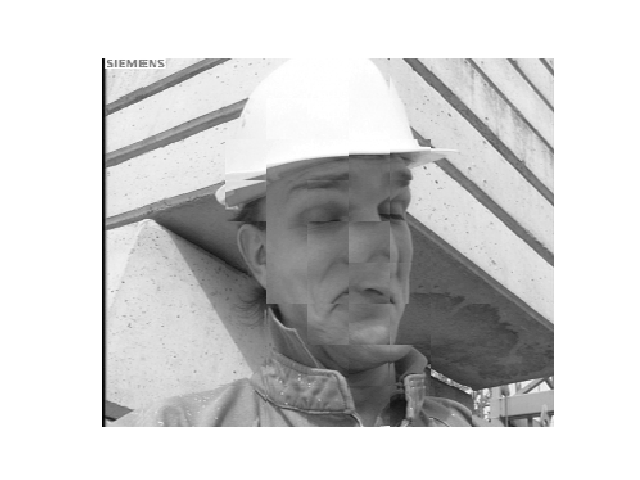

In [32]:
anchorframe = cv2.imread('foremanY69.png',0)
targetframe = cv2.imread('foremanY72.png',0)

ebma16, origin16, direction16= ma.EBMA(targetframe, anchorframe, 16)
plt.figure('foreman')
plt.imshow(ebma16, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

(288, 352)


<IPython.core.display.Javascript object>


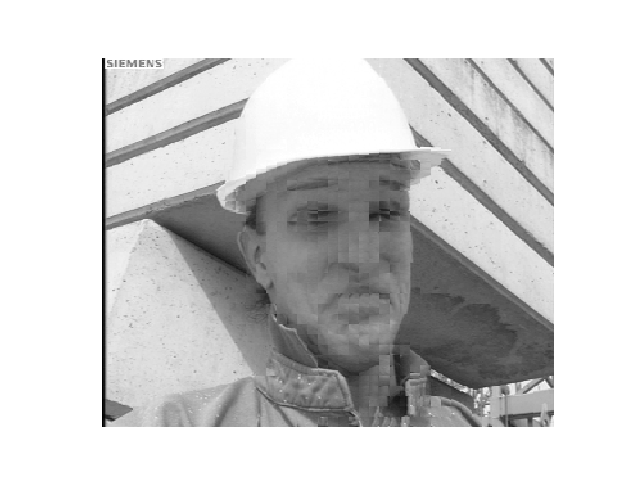

In [33]:
ebma8, origin, direction= ma.EBMA(targetframe, anchorframe, 8)
plt.figure('foreman8')
plt.imshow(ebma8, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()

(288, 352)


<IPython.core.display.Javascript object>


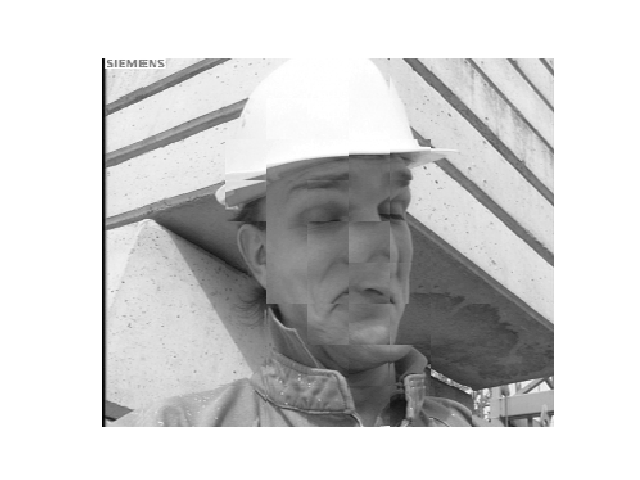

In [35]:
ebma32, origin, direction= ma.EBMA(targetframe, anchorframe, 32)
plt.figure('foreman32')
plt.imshow(ebma32, cmap='gray')
plt.xticks([]), plt.yticks([])  # this hides the axis ticks
for spine in plt.gca().spines.values():  #hide image border
    spine.set_visible(False)
plt.show()